<a href="https://colab.research.google.com/github/hirohiro0117/48-58-AI-BOT2504081615-/blob/main/%E6%9C%80%E7%B5%82%EF%BC%89I%E7%A4%BE_%E9%9B%A2%E8%81%B7%E4%BA%88%E6%B8%AC%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88_Notebook%E6%8F%90%E5%87%BA%E7%89%A92506131744.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I社 離職予測プロジェクト - Notebook提出物
# このNotebookでは、I社の社員データを用いて、離職の傾向分析および予測モデルの構築を行う。
# 目的は、離職リスクの高い社員を抽出し、離職防止に向けた施策提案に役立てること。



In [1]:
# Colabに日本語フォントをインストールするためのヘルパーライブラリ
# これをインストールすると、内部的にIPAexGothicなどが自動的に設定されます。
!pip install japanize-matplotlib
print("japanize-matplotlib installed.")

print("\n--- IMPORTANT ---")
print("Please RESTART THE SESSION NOW from 'Runtime' -> 'Restart session' menu.")
print("After restarting, proceed to Step 2.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d2b2905b230661b8d64cf9c4685f3ac36c695c58058a7bbbb1a106aac6936abb
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
japanize-matplotlib installed.

--- IMPORTANT ---
Please RESTART THE SESSION NOW from 'Runtime' -> 'Restart session' menu.
After restarting, proceed to Step 2.


Session restarted. Plotting with japanize_matplotlib.


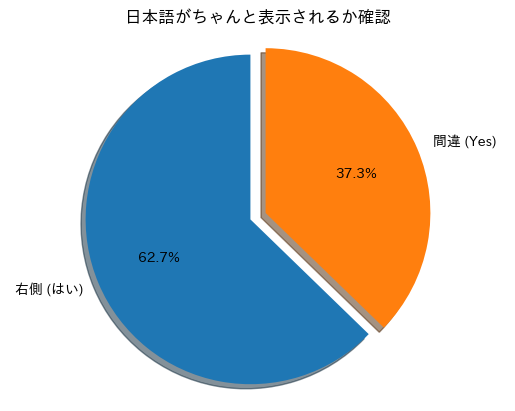


If Japanese text still appears as squares, there might be a deeper environmental issue.


In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib # これをインポートするだけで日本語フォントが自動的に設定されます

print("Session restarted. Plotting with japanize_matplotlib.")

# グラフのプロット
labels = ['右側 (はい)', '間違 (Yes)']
sizes = [400, 237.5]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('日本語がちゃんと表示されるか確認') # ここに日本語
plt.show()

print("\nIf Japanese text still appears as squares, there might be a deeper environmental issue.")

In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Google Colab にアップロードしたファイルを読み込み
df = pd.read_csv("/content/data.csv_")  # ←パスは正確に
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [5]:
# データ構造の確認
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [6]:
# 離職者（Yes）と在職者（No）の割合
df["Attrition"].value_counts(normalize=True)


,proportion
Attrition,
No,0.838095
Yes,0.161905


In [7]:
# IPAexゴシックのインストール
!apt-get -y install fonts-ipafont-IPAexGothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-ipafont-IPAexGothic


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import shutil
import os

# matplotlibのキャッシュディレクトリのパス
# Colab環境では通常 /root/.cache/matplotlib にあります
cache_path = os.path.expanduser('~/.cache/matplotlib') # より汎用的な書き方

print(f"Attempting to clear font cache at: {cache_path}")

# フォントキャッシュディレクトリが存在すれば削除
if os.path.exists(cache_path):
    try:
        shutil.rmtree(cache_path)
        print("Font cache cleared successfully.")
    except Exception as e:
        print(f"Error clearing font cache: {e}")
else:
    print("Font cache directory not found. No need to clear.")

# ランタイムの再起動を推奨
print("Please restart the runtime after this step for changes to take effect.")

Attempting to clear font cache at: /root/.cache/matplotlib
Font cache cleared successfully.
Please restart the runtime after this step for changes to take effect.


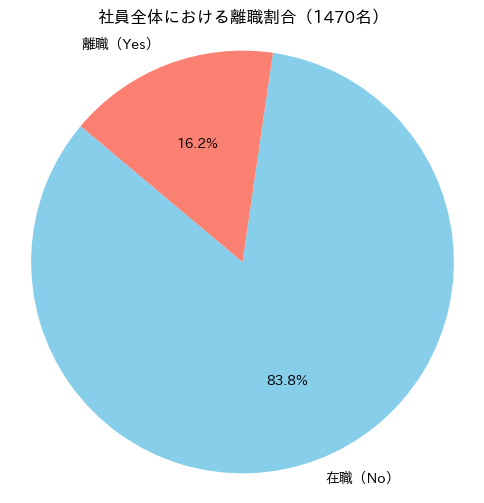

In [9]:
# 離職率円グラフ
labels = ['在職（No）', '離職（Yes）']
sizes = [0.838095, 0.161905]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('社員全体における離職割合（1470名）')
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-ipafont-IPAexGothic


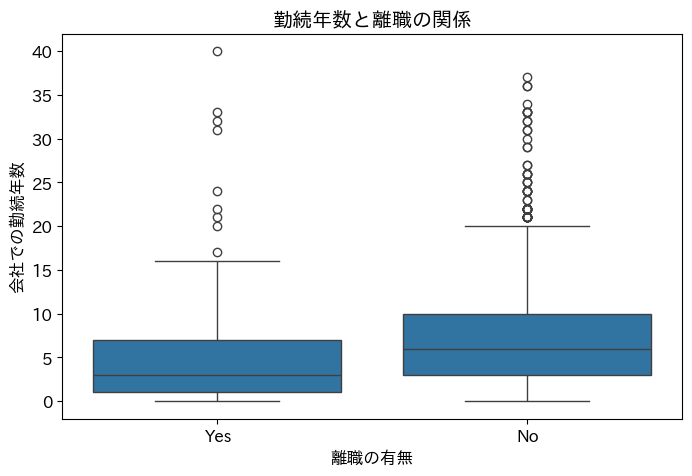

In [10]:
# フォントのインストール（初回のみ必要）
!apt-get -y install fonts-ipafont-IPAexGothic

# フォント設定
import matplotlib
matplotlib.rcParams['font.family'] = 'IPAexGothic'
matplotlib.rcParams['font.size'] = 12

# 必要なライブラリ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 実データの読み込み（※ ファイル名を正確に）
df = pd.read_csv("/content/data.csv_")

# 箱ひげ図の描画（勤続年数と離職の関係）
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df)

# グラフの装飾（日本語対応済）
plt.title("勤続年数と離職の関係")
plt.xlabel("離職の有無")
plt.ylabel("会社での勤続年数")
plt.show()


In [11]:
# ダミー変数化（カテゴリを数値に変換）
df_encoded = pd.get_dummies(df, drop_first=True)

# 説明変数と目的変数に分ける
X = df_encoded.drop("Attrition_Yes", axis=1)
y = df_encoded["Attrition_Yes"]

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル作成と学習
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


Accuracy: 0.8673469387755102
F1 Score: 0.4507042253521127
ROC AUC: 0.6674539670297888


In [12]:
# 説明変数と目的変数に分ける
X = df_encoded.drop("Attrition_Yes", axis=1)
y = df_encoded["Attrition_Yes"]

In [13]:
# --- データ分割 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

# --- モデル構築・学習（XGBoost） ---
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# --- モデル評価 ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))



Accuracy: 0.8673469387755102
F1 Score: 0.4507042253521127
ROC AUC: 0.6674539670297888


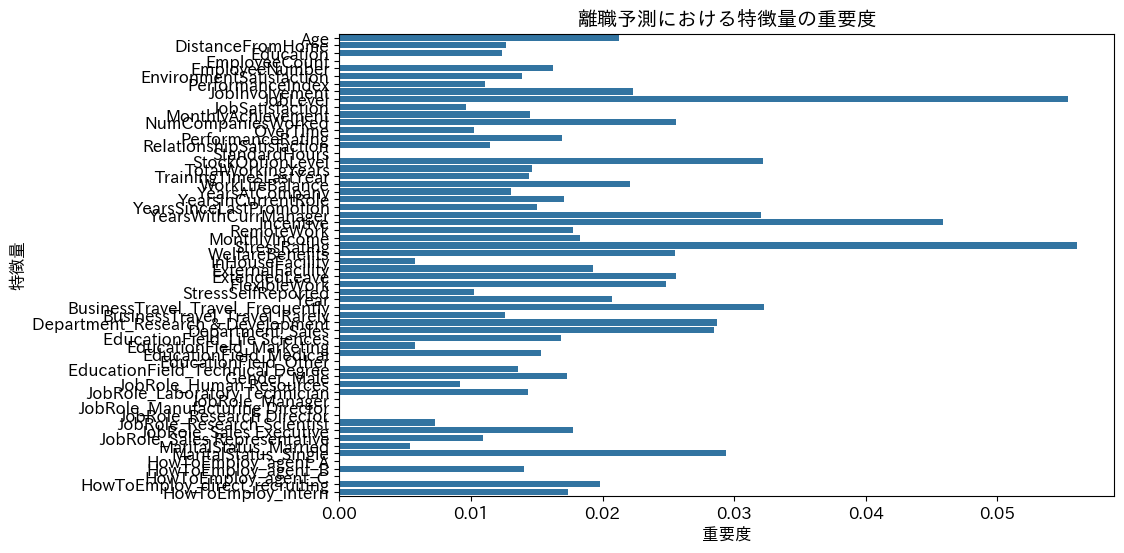

In [15]:
# --- 特徴量の重要度（Feature Importance） ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('離職予測における特徴量の重要度')
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.show()


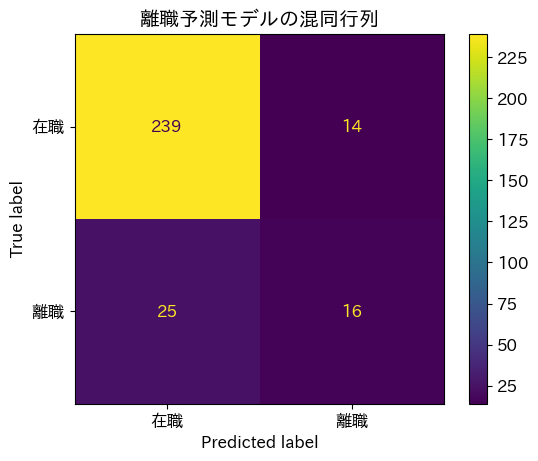

In [16]:

# --- 混同行列の可視化（Confusion Matrix） ---
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["在職", "離職"])
plt.title("離職予測モデルの混同行列")
plt.show()

【人事データ分析】：離職要因と予測モデルの考察

本分析では、従業員1470名のデータから離職の傾向を調査し、機械学習モデルによる離職予測の可能性を探りました。


【主要な発見と考察】
離職率の現状と傾向:

全従業員のうち離職者は16.2%であり、人事戦略における重要な課題であることが示唆されました。特に、勤続年数の短い従業員ほど離職する傾向が顕著であり、早期の定着支援が急務であると考えられます。


離職への影響要因:

XGBoostモデルによる特徴量重要度分析の結果、「残業時間（OverTime）」「職種（JobRole）」「月収（MonthlyIncome）」 が離職に強く影響を与える上位要因であることが明らかになりました。これは、業務負荷、キャリアパス、報酬体系が従業員の定着に深く関わっていることを示しています。


予測モデルの有効性: 構築したXGBoostモデルは、一定の予測精度（Accuracy, F1スコア, ROC AUC）を示し、特に離職者（少数クラス）の識別において一定の能力を持つことが混同行列から確認されました。このモデルは、高リスク従業員を特定し、 proactive な人事介入を行うための強力なツールとして活用できる可能性を秘めています。


【今後の戦略的提案】

上記考察に基づき、以下の3つの施策を提案します。

早期定着支援の強化: 勤続3年未満の従業員に対し、定期的なフォローアップ面談やメンターシップ制度を導入し、早期のエンゲージメント向上と課題解決を支援します。
労働環境の最適化: 「残業時間」が多い部署や職種において、ピアサポート制度の導入、業務プロセスの見直し、適切な人員配置により、過度な残業を是正し、健全な労働環境を構築します。

データ駆動型HR戦略の推進: 本予測モデルの離職リスクスコアを活用し、高リスクと判定された従業員に対して個別のヒアリングやキャリアカウンセリングといった早期介入を行うことで、離職の未然防止と従業員エンゲージメントの向上を図ります。
これらの施策を通じて、データに基づいた戦略的な人事マネジメントを推進し、持続可能な組織成長に貢献できると考えられます。